In [2]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import where

In [3]:
# generate 2d classification dataset
X, Y = make_moons(n_samples=100, noise=0.2, random_state=1)

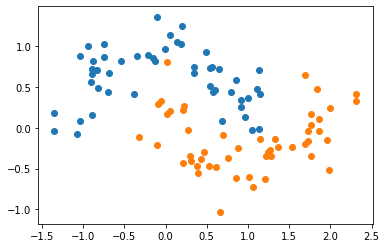

In [4]:
# scatter plot for each class value
for class_value in range(2):
    # select indices of points with the class label
    row_ix = where(Y == class_value)
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

In [5]:
# split into train and test sets
n_train = 30
trainX, testX = X[n_train:, :], X[:n_train, :]
trainY, testY = Y[n_train:], Y[:n_train]

In [7]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

W1222 16:28:00.852311 16872 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1222 16:28:00.900661 16872 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3645: The name tf.log is deprecated. Please use tf.math.log instead.

W1222 16:28:00.910664 16872 deprecation.py:323] From C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
# fit model
history = model.fit(trainX, trainY, epochs=4000,
                   validation_data=(testX, testY), verbose=0)

W1222 16:28:44.599380 16872 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



In [9]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)

In [10]:
train_acc

1.0

In [11]:
test_acc

0.9666666388511658

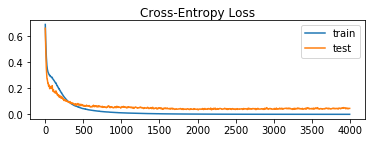

In [13]:
# plot learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

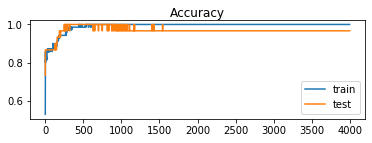

In [14]:
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()